In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

In [ ]:
print(train_data[0])
print(len(train_data[0]))
print(train_labels[0])

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):  # one-hot encoding
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # sequence is a list
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
print(x_train.shape)
print(x_train[0])

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,))) # Hidden Layer1
model.add(layers.Dense(16, activation = 'relu')) # Hidden Layer2
model.add(layers.Dense(1, activation = 'sigmoid')) # Scoring

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
import tensorflow as tf
from keras.metrics import AUC

model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['acc',AUC(name='auc')])

history = model.fit(partial_x_train,  # fit function trains model
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.5992 - acc: 0.6961 - auc: 0.7701 - val_loss: 0.3793 - val_acc: 0.8715 - val_auc: 0.9415
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3225 - acc: 0.9009 - auc: 0.9601 - val_loss: 0.3050 - val_acc: 0.8851 - val_auc: 0.9526
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2321 - acc: 0.9261 - auc: 0.9767 - val_loss: 0.3066 - val_acc: 0.8769 - val_auc: 0.9536
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1839 - acc: 0.9355 - auc: 0.9848 - val_loss: 0.2742 - val_acc: 0.8916 - val_auc: 0.9550
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1408 - acc: 0.9542 - auc: 0.9911 - val_loss: 0.3042 - val_acc: 0.8821 - val_auc: 0.9527
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1142 - acc: 0.9665 - auc: 0.9948 - val_loss: 0.2943 - val_acc: 0.8840 - val_auc: 0.9520
Epoch 7/20
30/30 [====

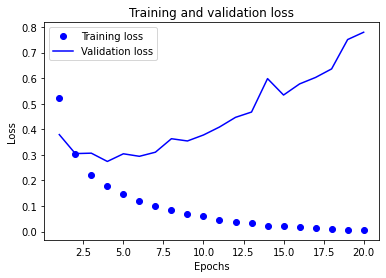

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss') # make a graph
plt.plot(epochs, val_loss, 'b', label = 'Validation loss') # make a graph
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

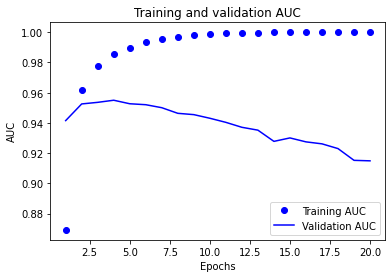

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
auc = history_dict['auc']
val_auc = history_dict['val_auc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, auc, 'bo', label = 'Training AUC') # make a graph
plt.plot(epochs, val_auc, 'b', label = 'Validation AUC') # make a graph
plt.title('Training and validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

plt.show()

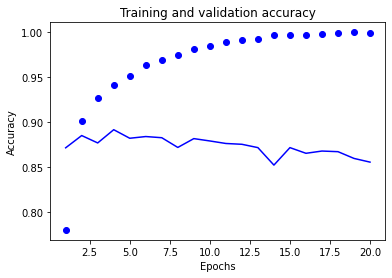

In [ ]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend

plt.show()

In [ ]:
print(model.evaluate(x_test,y_test)) #Test

782/782 [==============================] - 2s 3ms/step - loss: 0.8770 - acc: 0.8374 - auc: 0.9000
[0.8769925832748413, 0.837440013885498, 0.9000124931335449]
